<a href="https://colab.research.google.com/github/Sivateja-Varma/mycodes.py/blob/main/loan_sanctioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/loan.csv')

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
dataset.shape

(614, 13)

In [ ]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
dataset  = dataset.dropna()

In [ ]:
dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<Axes: xlabel='Education', ylabel='count'>

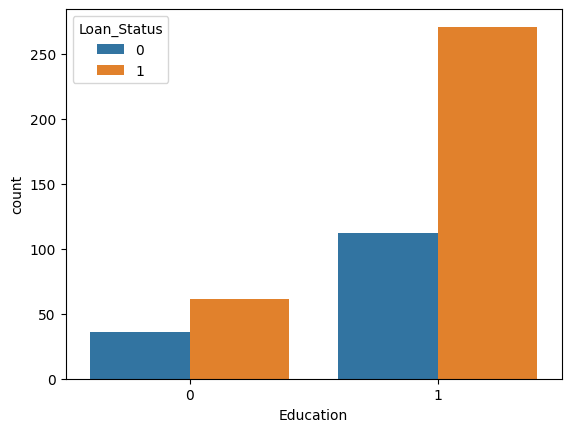

In [ ]:
sns.countplot(x='Education', hue='Loan_Status', data=dataset)

<Axes: xlabel='Property_Area', ylabel='count'>

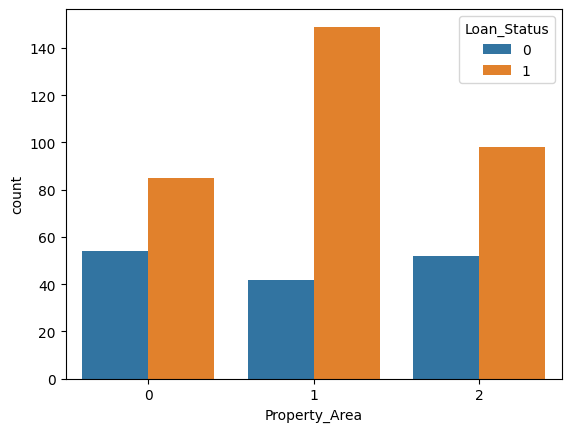

In [ ]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=dataset)

In [ ]:
dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [ ]:
dataset.replace({'3+':4}, inplace=True)

In [ ]:
dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


In [ ]:
dataset['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,191
Urban,150
Rural,139


In [ ]:
dataset = dataset.replace({
    'Loan_Status': {'Y': 1, 'N': 0},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Gender': {'Male': 0, 'Female': 1},
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
    'Married': {'No': 0, 'Yes': 1},
    'Self_Employed': {'No': 0, 'Yes': 1}
    # ... add other columns and their mapping as needed
})

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
dataset = dataset.drop(columns='Loan_ID')

In [ ]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
X = dataset.drop(columns='Loan_Status', axis=1)
Y = dataset['Loan_Status']

In [ ]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        1          1          1              0             4583   
2         0        1          0          1              1             3000   
3         0        1          0          0              0             2583   
4         0        0          0          1              0             6000   
5         0        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       1        0          0          1              0             2900   
610       0        1          4          1              0             4106   
611       0        1          1          1              0             8072   
612       0        1          2          1              0             7583   
613       1        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
#training accuracy
X_train_prediction = classifier.predict(X_train)
accuracy_score(X_train_prediction, Y_train)

0.7476851851851852

In [ ]:
#testing accuracy
X_test_prediction = classifier.predict(X_test)
accuracy_score(X_test_prediction, Y_test)

0.8333333333333334

In [ ]:
input = (	0,	1,	0,	1,	1,	3000,	0.0,	66.0,	360.0,	1.0,	2)
input_data_asarray = np.asarray(input)
input_data_reshaped = input_data_asarray.reshape(1,-1)
prediction = classifier.predict(input_data_reshaped)
print(prediction)

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
